In [373]:
import pandas as pd
df=pd.read_csv("ticket.csv")
df=df.dropna()

In [374]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [2]:
inputs=df.drop(columns=['Survived','PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'])
target=df['Survived']

In [376]:
inputs.head(10)

,Pclass,Sex,Age,Fare,sex_n
1,1,female,38.0,71.2833,0
3,1,female,35.0,53.1000,0
6,1,male,54.0,51.8625,1
10,3,female,4.0,16.7000,0
11,1,female,58.0,26.5500,0
21,2,male,34.0,13.0000,1
23,1,male,28.0,35.5000,1
27,1,male,19.0,263.0000,1
52,1,female,49.0,76.7292,0
54,1,male,65.0,61.9792,1


In [4]:
from sklearn.preprocessing import LabelEncoder

In [380]:
sex_en=LabelEncoder()
inputs['sex_n']=sex_en.fit_transform(inputs['Sex'])

In [381]:
inputs_n=inputs.drop(columns=['Sex'])

In [35]:
inputs_n=inputs_n.round().astype(int)

In [304]:
from sklearn import tree
model= tree.DecisionTreeClassifier(max_depth=4)
model.fit(inputs_n,target)

DecisionTreeClassifier(max_depth=4)

In [406]:
inputs_n1=inputs_n.dropna()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_n,target,test_size=0.3)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8181818181818182

In [367]:
import matplotlib.pyplot as plt
fig=plt.figure()

<Figure size 640x480 with 0 Axes>

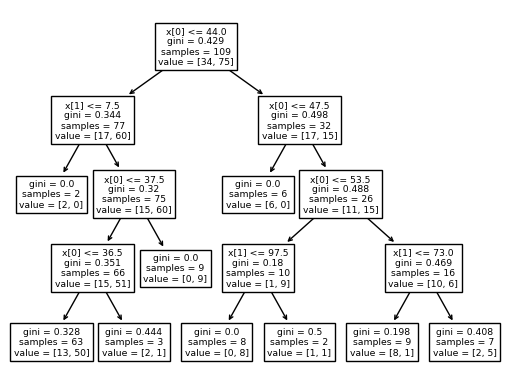

In [368]:
tree.plot_tree(model)
plt.show()


In [382]:
inputs_n

,Pclass,Age,Fare,sex_n
1,1,38.0,71.2833,0
3,1,35.0,53.1000,0
6,1,54.0,51.8625,1
10,3,4.0,16.7000,0
11,1,58.0,26.5500,0
...,...,...,...,...
871,1,47.0,52.5542,0
872,1,33.0,5.0000,1
879,1,56.0,83.1583,0
887,1,19.0,30.0000,0
